# Dose Limited and Chromatic blur limited resolution

## Chromatic blur limited resolution

Chromatic blur in electron microscopy is the blur and loss of resolution due to the energy spread of the electron beam. This energy spread is worsened by an increase in thickness due to inelastic scattering and thus chromatic blur can be modelled as a function of thickness. 

This equation from [de Jong et al (2019)](https://www.nature.com/articles/s41578-018-0071-2) can model this: 

\\[d = \frac{6 \times10^{12}\alpha C_{c}t}{E^2}\\]

	d - Resolution limit
	α - Objective aperture semi-angle
	CC - Chromatic aberration constant
	t - Thickness

In [39]:
import math
import numpy 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size']=30
matplotlib.rcParams['axes.linewidth'] = 4
matplotlib.rcParams['lines.linewidth'] = 4

In [111]:
alpha = 10 #mrad
Cc = 2 #mm
E = 200 #KeV
t = 1000 #nm

def adjust_units(alpha, Cc, E, t):
    alpha = alpha*1e-3
    Cc = Cc*1e-3
    E = E*1e3
    t = t*1e-9
    #print(alpha, Cc, E, t)
    return alpha, Cc, E, t

#alpha, Cc, E, t = adjust_units(alpha, Cc, E, t)

def calculate_resolution(alpha, Cc, E, t):
    alpha, Cc, E, t =adjust_units(alpha, Cc, E, t)
    d = (6*1e12*alpha*Cc*t)/(E**2)
    d = d*1e9
    return d
#print(d*1e9,'nm')



In [51]:
print(calculate_resolution(10, 2, 200,1000))

3e+21


In [112]:
alpha = 5 #mrad
Cc = 2 #mm
E = 200 #KeV
t = 1000 #nm
d100 = []
d200 = []
d300 = []
for t in range(0, 1600, 1):
    d100.append(calculate_resolution(alpha, Cc, 100, t))
    d200.append(calculate_resolution(alpha, Cc, 200, t))
    d300.append(calculate_resolution(alpha, Cc, 300, t))
    

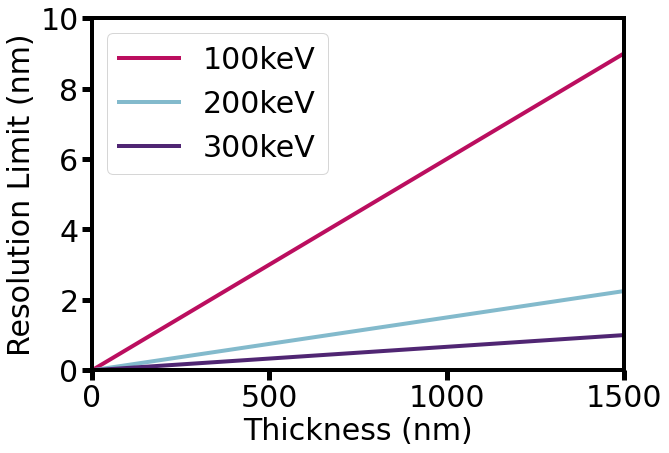

In [151]:
fig = plt.figure(figsize=(10,7))
plt.plot(range(0,1600,1), d100, label='100keV', color='#BB0E5F')
plt.plot(range(0,1600,1), d200, label='200keV', color='#83BACC')
plt.plot(range(0,1600,1), d300, label='300keV', color='#502673' )
plt.ylabel('Resolution Limit (nm)')
plt.tick_params(length=10, width=5)
plt.xlabel('Thickness (nm)')
plt.ylim(0, 10)
plt.xlim(0, 1500)
plt.legend()
fig.tight_layout()
plt.show()

# Dose limited resolution

The resolution may be dose-limited if the sample is sensitive to the electron beam or if the imaging was limited by exposure time. The dose-limited resolution value can be approximated using the following equation:

\\[s=\frac{k}{(1-f)\sqrt{N}\sqrt{DQE}}\\]



Where:

	s - Resolution limit
	k - Signal-to-noise ratio required to detect signal (Rose Criterion) 
	f - Fraction of electrons which contribute to the noise
	N - Electron dose
	DQE - Detector Quantum Efficiency

Values for k range between 3-5.

Values for f may be approx 95% for biological samples. Will increase depending on SNR, so for thick sample with increased inelastic scattering this  will be lower. 

DQE is the ratio of SNR in the image compared to SNR of the scattered electrons - this is a measure of detector image quality. It ranges with both detector quality and spatial frequencies. At peak performance a modern direct electron detector has a DQE of \~0.85, but this decreases at higher spatial frequencies. Charge coupled detectors (CCDs) have much worse DQE (~0.2).

N is the electron dose limit - this limit generally comes from the sensitivity of the sample to the electron beam. This may be somewhere between 1-100 $e^-Å^{-2}$ for biological samples (will be towards the low end of this scale at room temperature)



### Make function:

In [26]:
def dose_limit_resolution(k, f, N, DQE):
    return k/((1-f)*(N**0.5)*(DQE**0.5))
    

### Plot graph:

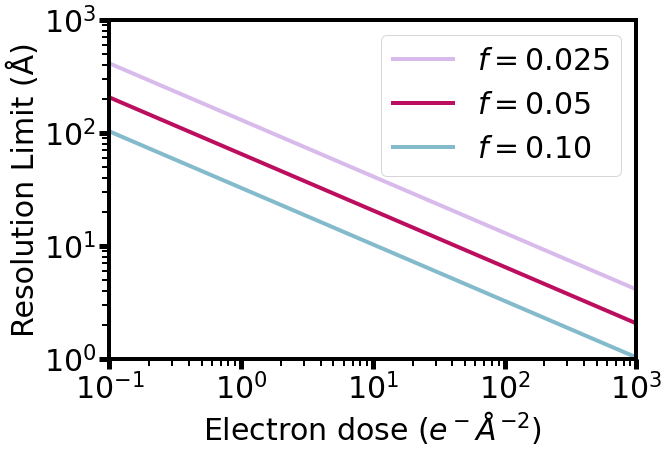

In [171]:
k = 3
f = 0.95
N=10 #e-Å^2
DQE = 0.85

fs = [0.95, 0.9, 0.975]
s1 =[]
s2 =[]
s3 = []
Ns = [x/10 for x in range(1, 10000,1)]
for N in Ns:
    s1.append(dose_limit_resolution(k, fs[0],N, DQE))
    s2.append(dose_limit_resolution(k, fs[1],N, DQE))
    s3.append(dose_limit_resolution(k, fs[2],N, DQE))
    
fig, ax =plt.subplots(1,1,figsize=(10,7))
plt.tick_params(length=10, width=5)
ax.tick_params(which='minor', length=7, width=2 )
plt.xlim(0.1,1000)
plt.ylim(1,1e3)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Electron dose ($e^-Å^{-2}$)')
plt.ylabel('Resolution Limit (Å)')
plt.plot(Ns,s3, label='$\it{f}=0.025$', color='#D8BBEA')
plt.plot(Ns,s1, label='$\it{f}=0.05$', color='#BB0E5F')
plt.plot(Ns,s2, label='$\it{f}=0.10$', color='#83BACC')
plt.legend()
fig.tight_layout()
plt.show()


### Use calculator:

In [168]:
k = 3
f = 0.975
N=1 #e-Å^2
DQE = 0.7
print(f'{round(dose_limit_resolution(k, f, N, DQE),1)/10} nm resolution')

14.34 nm resolution
